In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Saunders function
def saunders_function(L, alpha, sigma, L_star, phi_star):
    return phi_star * (L / L_star) ** (1-alpha) * np.exp(-1 / (2 * sigma ** 2) * (np.log10(1 + (L / L_star)))**2)

# Gruppioni
grup_redshift_bins = [[0.0, 0.3], [0.3, 0.45], [0.45, 0.6], [0.6, 0.8], [0.8, 1.0], [1.0, 1.2], [1.2, 1.7], [1.7, 2.0], [2.0, 2.5], [2.5, 3.0], [3.0, 4.2]]
z = np.mean(grup_redshift_bins, axis=1)
alpha = [1.15, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
sigma = [0.52, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
lstar = [10.12, 10.41, 10.55, 10.71, 10.97, 11.13, 11.37, 11.50, 11.60, 11.92, 11.90]
pstar = [-2.29, -2.31, -2.35, -2.35, -2.40, -2.43, -2.70, -3.00, -3.01, -3.27, -3.74]
lstar_error = [0.16, 0.03, 0.03, 0.03, 0.04, 0.04, 0.03, 0.03, 0.03, 0.08, 0.16]
pstar_error = [0.06, 0.03, 0.05, 0.06, 0.05, 0.04, 0.04, 0.03, 0.11, 0.18, 0.30]


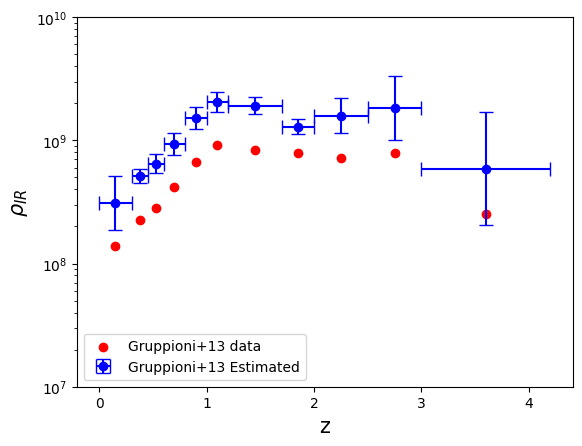

In [12]:
lower_bounds = np.power(10.0, np.arange(0, 32, 2)).tolist()
lower_bounds[0] = 0
upper_bounds = lower_bounds[1:] + [np.inf]

# X error
z_err_left = z - np.array(grup_redshift_bins)[:,0]
z_err_right = np.array(grup_redshift_bins)[:,1] - z

density = []
density_up = []
density_down = []

# Loop over redshift bins
for a, s, ls, ps, lse, pse in zip(alpha, sigma, lstar, pstar, lstar_error, pstar_error): 
    bound_area = 0
    bound_area_up = 0
    bound_area_down = 0
    
    # Loop over bounds
    for u, l in zip(upper_bounds, lower_bounds): 
        bound_area += integrate.quad(saunders_function, l, u, args=(a, s, 10**ls, 10**ps))[0]
        bound_area_up += integrate.quad(saunders_function, l, u, args=(a, s, 10**(ls+lse), 10**(ps+pse)))[0]
        bound_area_down += integrate.quad(saunders_function, l, u, args=(a, s, 10**(ls-lse), 10**(ps-pse)))[0]
    
    # Y and Y error
    density.append(bound_area)
    density_up.append(bound_area_up - bound_area)
    density_down.append(bound_area - bound_area_down)

# Gruppioni+13 data
y = [137890670.60798505, 225275093.33384562, 281586871.7505638, 417018228.2116913, 669239236.9209986, 914619191.7411913, 836528265.90131, 785866610.7290014, 712382395.0419666, 785866610.7290014, 252988497.1601284]
plt.scatter(z, y, color='red', label='Gruppioni+13 data')

plt.errorbar(z, density, yerr=[density_down, density_up], xerr=[z_err_left, z_err_right], ls='none', marker='o', capsize=5, color='blue', label='Gruppioni+13 Estimated')
plt.ylabel(r'$\rho_{IR}$', fontsize=15)
plt.xlabel('z', fontsize=15)
plt.yscale('log')
plt.ylim(10**7, 10**10)
plt.legend(loc='lower left')
plt.show()